In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir_train = pathlib.Path(r"C:\Users\RUSHIKESH\Desktop\skin_dignosis\train")
data_dir_test = pathlib.Path(r"C:\Users\RUSHIKESH\Desktop\skin_dignosis\testing")


In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

440
183


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the datase
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 2940 files belonging to 5 classes.
Using 2352 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 2940 files belonging to 5 classes.
Using 588 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczemaa', 'Rosacea']


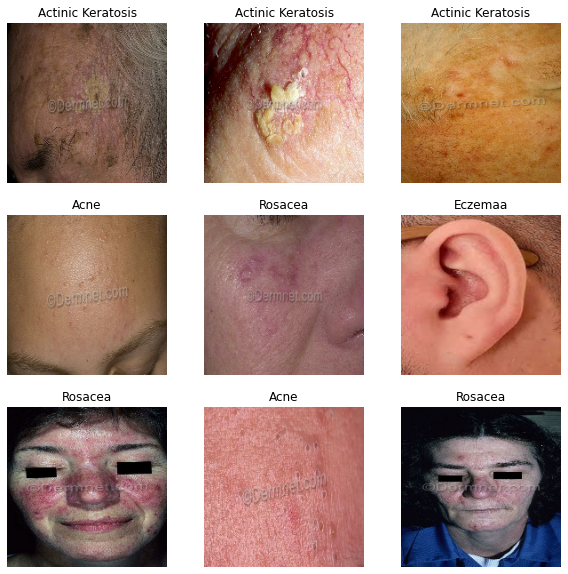

In [8]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
### Your code goes here

num_classes = 5 # As target class has 5 labels

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
74/74 [==============================] - 36s 450ms/step - loss: 1.3925 - accuracy: 0.3975 - val_loss: 1.0944 - val_accuracy: 0.5884
Epoch 2/20
74/74 [==============================] - 34s 455ms/step - loss: 0.8705 - accuracy: 0.6803 - val_loss: 0.7632 - val_accuracy: 0.7109
Epoch 3/20
74/74 [==============================] - 32s 436ms/step - loss: 0.5173 - accuracy: 0.8163 - val_loss: 0.5320 - val_accuracy: 0.7959
Epoch 4/20
74/74 [==============================] - 34s 457ms/step - loss: 0.3318 - accuracy: 0.8805 - val_loss: 0.3473 - val_accuracy: 0.8741
Epoch 5/20
74/74 [==============================] - 36s 487ms/step - loss: 0.2025 - accuracy: 0.9332 - val_loss: 0.2173 - val_accuracy: 0.9422
Epoch 6/20
74/74 [==============================] - 33s 439ms/step - loss: 0.1110 - accuracy: 0.9639 - val_loss: 0.2140 - val_accuracy: 0.9473
Epoch 7/20
74/74 [==============================] - 36s 482ms/step - loss: 0.0768 - accuracy: 0.9775 - val_loss: 0.2502 - val_accuracy: 0.9167

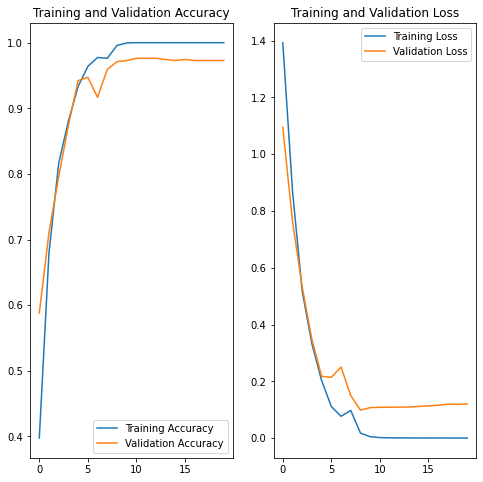

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])


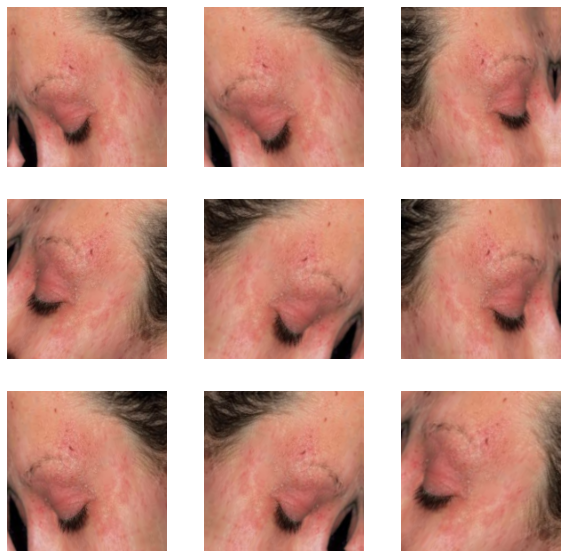

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [18]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
     

Epoch 1/20
74/74 [==============================] - 43s 555ms/step - loss: 1.4870 - accuracy: 0.3299 - val_loss: 1.4388 - val_accuracy: 0.3997
Epoch 2/20
74/74 [==============================] - 37s 503ms/step - loss: 1.3315 - accuracy: 0.4103 - val_loss: 1.4505 - val_accuracy: 0.3980
Epoch 3/20
74/74 [==============================] - 42s 569ms/step - loss: 1.2404 - accuracy: 0.4826 - val_loss: 1.2411 - val_accuracy: 0.5272
Epoch 4/20
74/74 [==============================] - 47s 634ms/step - loss: 1.1227 - accuracy: 0.5514 - val_loss: 1.1637 - val_accuracy: 0.5408
Epoch 5/20
74/74 [==============================] - 40s 536ms/step - loss: 1.0116 - accuracy: 0.6020 - val_loss: 1.1600 - val_accuracy: 0.6105
Epoch 6/20
74/74 [==============================] - 37s 500ms/step - loss: 0.8671 - accuracy: 0.6662 - val_loss: 0.8540 - val_accuracy: 0.7194
Epoch 7/20
74/74 [==============================] - 50s 673ms/step - loss: 0.7847 - accuracy: 0.6986 - val_loss: 0.9484 - val_accuracy: 0.6463

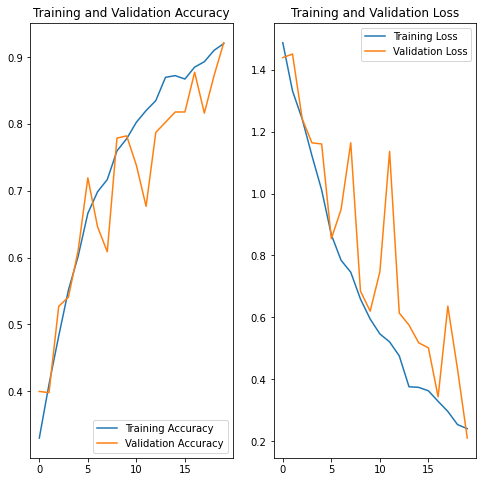

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
model.save("C:/Users/RUSHIKESH/Desktop/skin_dignosis/my_cnn_model.h5")

In [21]:
## Your code goes here.

from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

440


In [22]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('C:\\Users\\RUSHIKESH\\Desktop\\skin_dignosis\\train\\Acne\\033007HB.jpg', 'Acne'), ('C:\\Users\\RUSHIKESH\\Desktop\\skin_dignosis\\train\\Acne\\033073HB.jpg', 'Acne')]


In [23]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne
1,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne
2,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne
3,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne
4,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne


In [24]:
original_df[['Label']].value_counts()

Label               
Acne                    88
Actinic Keratosis       88
Basal Cell Carcinoma    88
Eczemaa                 88
Rosacea                 88
dtype: int64

In [25]:
original_df[['Label']].value_counts(normalize=True)

Label               
Acne                    0.2
Actinic Keratosis       0.2
Basal Cell Carcinoma    0.2
Eczemaa                 0.2
Rosacea                 0.2
dtype: float64

In [26]:
!pip install Augmentor


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 88 image(s) found.
Output directory set to C:\Users\RUSHIKESH\Desktop\skin_dignosis\train/Acne\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x479 at 0x2637B9C6AA0>: 100%|█| 500/500 [00:02<00:


Initialised with 88 image(s) found.
Output directory set to C:\Users\RUSHIKESH\Desktop\skin_dignosis\train/Actinic Keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x2637B95AFB0>: 100%|█| 500/500 [00:02<00:00, 185.07 Samples


Initialised with 88 image(s) found.
Output directory set to C:\Users\RUSHIKESH\Desktop\skin_dignosis\train/Basal Cell Carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=720x474 at 0x2637B9309A0>: 100%|█| 500/500 [00:02<00:00, 178.99 Samples


Initialised with 88 image(s) found.
Output directory set to C:\Users\RUSHIKESH\Desktop\skin_dignosis\train/Eczemaa\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1640x1130 at 0x2637B95A800>: 100%|█| 500/500 [00:03<0


Initialised with 88 image(s) found.
Output directory set to C:\Users\RUSHIKESH\Desktop\skin_dignosis\train/Rosacea\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=616x720 at 0x2637B9A43D0>: 100%|█| 500/500 [00:03<00:


In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5000


In [29]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:2]

['C:\\Users\\RUSHIKESH\\Desktop\\skin_dignosis\\train\\Acne\\output\\Acne_original_033007HB.jpg_3a37679e-3d43-46fe-84fd-56e199d364df.jpg',
 'C:\\Users\\RUSHIKESH\\Desktop\\skin_dignosis\\train\\Acne\\output\\Acne_original_033007HB.jpg_5a84a3b4-9581-43be-bfc7-6bb44c89602c.jpg']

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['Acne', 'Acne']

In [31]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.shape

C:\Users\RUSHIKESH\AppData\Local\Temp\ipykernel_25348\4293209412.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


(5440, 2)

In [33]:
new_df.head()

,Path,Label
0,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne
1,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne
2,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne
3,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne
4,C:\Users\RUSHIKESH\Desktop\skin_dignosis\train...,Acne


In [34]:
# Checking the class distribution after adding 500 samples per label
new_df['Label'].value_counts(normalize=True)
     

Acne                    0.2
Actinic Keratosis       0.2
Basal Cell Carcinoma    0.2
Eczemaa                 0.2
Rosacea                 0.2
Name: Label, dtype: float64

In [35]:
new_df['Label'].value_counts()

Acne                    1088
Actinic Keratosis       1088
Basal Cell Carcinoma    1088
Eczemaa                 1088
Rosacea                 1088
Name: Label, dtype: int64

In [36]:
batch_size = 32
img_height = 180
img_width = 180

In [37]:
# if no changes made

# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5440 files belonging to 5 classes.
Using 4352 files for training.


In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 5440 files belonging to 5 classes.
Using 1088 files for validation.


In [39]:
## your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
136/136 [==============================] - 84s 599ms/step - loss: 1.4084 - accuracy: 0.3814 - val_loss: 1.4198 - val_accuracy: 0.4430
Epoch 2/30
136/136 [==============================] - 78s 572ms/step - loss: 1.1503 - accuracy: 0.5315 - val_loss: 1.1558 - val_accuracy: 0.5533
Epoch 3/30
136/136 [==============================] - 78s 573ms/step - loss: 0.9427 - accuracy: 0.6337 - val_loss: 1.2613 - val_accuracy: 0.6131
Epoch 4/30
136/136 [==============================] - 72s 529ms/step - loss: 0.8061 - accuracy: 0.6854 - val_loss: 0.7533 - val_accuracy: 0.7528
Epoch 5/30
136/136 [==============================] - 76s 561ms/step - loss: 0.6704 - accuracy: 0.7438 - val_loss: 0.6807 - val_accuracy: 0.7638
Epoch 6/30
136/136 [==============================] - 74s 546ms/step - loss: 0.5784 - accuracy: 0.7927 - val_loss: 0.6596 - val_accuracy: 0.7767
Epoch 7/30
136/136 [==============================] - 74s 539ms/step - loss: 0.4883 - accuracy: 0.8247 - val_loss: 0.5266 - val_ac

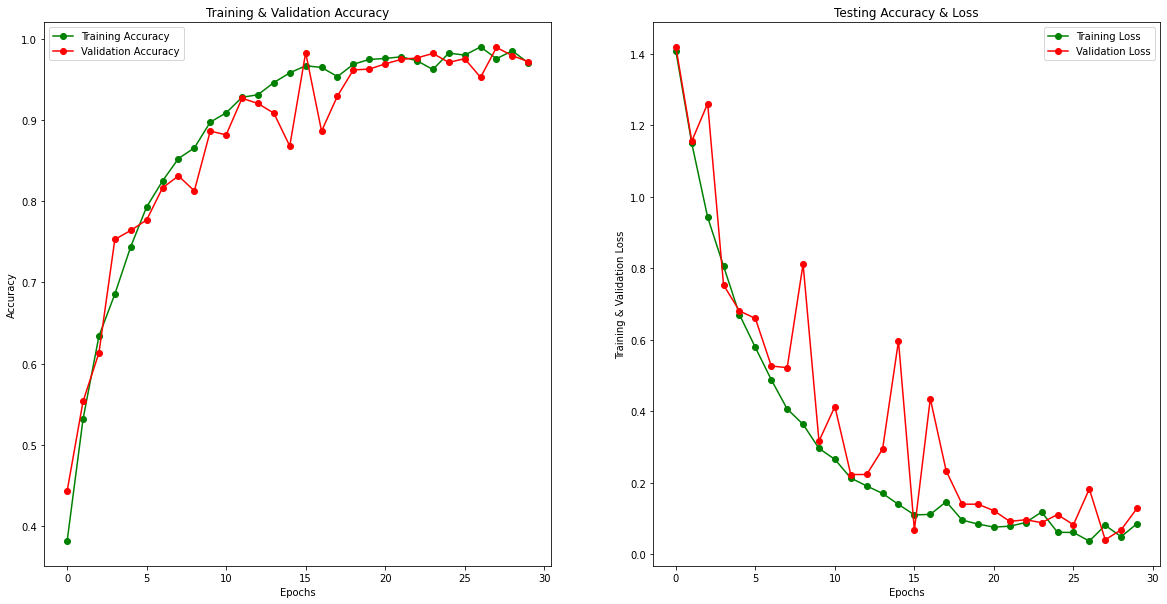

In [44]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

model.save("C:/Users/RUSHIKESH/Desktop/skin_dignosis/my_cnn_updated_model.h5")